# Importing Libraries

In [1]:
using MAT
using PyPlot
using ImageQuilting
using GeoStatsImages
using MultivariateStats
using JLD
using Plots

#Custom functions stored in a library
include("./ImageQuiltingHelpers.jl/src/ImageQuiltingHelpers.jl")
using ImageQuiltingHelpers


# 1. Initializations and Unconditional Simulations

I start this by importing the data. You can see the format from the output of the next two cells.

In [2]:
#Import Matlab Data
fracdata=matread("complete processed data.mat")

Dict{String,Any} with 8 entries:
  "R2_dmig"  => Dict{String,Any}(Pair{String,Any}("tmax", 3.99975e-8),Pair{Stri…
  "TI4_dmig" => Dict{String,Any}(Pair{String,Any}("tmax", 3.99975e-8),Pair{Stri…
  "TI2_dmig" => Dict{String,Any}(Pair{String,Any}("tmax", 3.99975e-8),Pair{Stri…
  "R1_dmig"  => Dict{String,Any}(Pair{String,Any}("tmax", 3.99975e-8),Pair{Stri…
  "R4_dmig"  => Dict{String,Any}(Pair{String,Any}("tmax", 3.99975e-8),Pair{Stri…
  "R3_dmig"  => Dict{String,Any}(Pair{String,Any}("tmax", 3.99975e-8),Pair{Stri…
  "TI3_dmig" => Dict{String,Any}(Pair{String,Any}("tmax", 3.99975e-8),Pair{Stri…
  "TI1_dmig" => Dict{String,Any}(Pair{String,Any}("tmax", 3.99975e-8),Pair{Stri…

In [3]:
#Show an example of the fields for each struct, just for reference
fracdata["R2_dmig"]

Dict{String,Any} with 22 entries:
  "tmax"          => 3.99975e-8
  "sTI"           => [0.00156502 0.00161257 … 0.00164644 0.00162116; 0.00164226…
  "x"             => [-0.042 -0.04 … 2.04 2.042]
  "dt"            => 7.5e-12
  "binary"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0…
  "env"           => [0.00156502 0.00161257 … 0.00164644 0.00162116; 0.00158022…
  "dmig"          => [-0.000398511 -0.000783725 … -0.000109158 -0.000812116; -0…
  "srcloc_x"      => [3.46945e-17 0.048 … 1.448 1.5]
  "zmig"          => [0.0 0.00042 … 2.11344 2.11386]
  "eps"           => [1.0 1.0 … 7.0 7.0; 1.0 1.0 … 7.0 7.0; … ; 1.0 1.0 … 7.0 7…
  "frequency_MHz" => 500.0
  "srcpulse"      => [5.43e-7 8.14486e-6 … 0.0 0.0]
  "mu"            => [1.0 1.0 … 1.025 1.025; 1.0 1.0 … 1.025 1.025; … ; 1.0 1.0…
  "recloc_x"      => [0.5 0.548 … 1.948 2.0]
  "z"             => [-0.102 -0.1 … 2.04 2.042]
  "pTI"           => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0…
  "npml"   

Next we prepare the data that I use in the simulations. I have created the function *prepareImages* as a part of the ImageQuiltingHelpers library to do this concisely for me. This function reads a set from the custom-formatted data and does 4 things. 

* Clips the x-axis of the primary TI to match the range of the secondary information

* Interpolates the secondary information to match the dimensions of the clipped TI

* Performs the proximity transform on the clipped primary information

* Convert the above 3 images to training images (add a ghost dimension) and return the 3 images

These three steps each return an image, hence the three outputs that you can see below. Each image is the same size so they can be used directly in simulations. We also define the number of realizations for the conditional and unconditional simulations in the following cell.

In [4]:
#Prepare all my data to have matching sizes before simulating
TI_prim, TI_aux, TI_prox = prepareImages(fracdata["TI2_dmig"]);
R_prim, R_aux, R_prox = prepareImages(fracdata["R2_dmig"]);

#Number of realizations
n=100;

Now we can start plotting and simulating. We perform the unconditional simulations using the binary image first. The next cell just plots the trianing image, the second performs the simulation, the third uses a custom function to save the results, and the fourth plots a summary of the realizations.

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] 

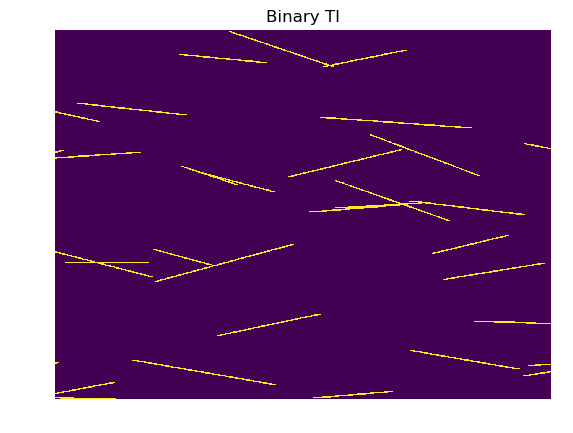

checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\Users\ammilten\.juli

In [20]:
#Plot binary training image
plotImage(TI_prim);
title("Binary TI");
axis("off");

In [21]:
#  Perform unconditional simulation on binary image
t_binary_uncond=[250 250 1]
binary_uncond = uncond_iqsim2d(TI_prim, t_binary_uncond , n);
binary_uncond_mean, binary_uncond_stdev=realizationStats(binary_uncond);

INFO: using GPU Turks


In [22]:
#Save unconditional simulation.
collectSimulation(binary_uncond,TI_prim,t_binary_uncond,saveSim=true,savename="Simulations/binary_uncond_sim");

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

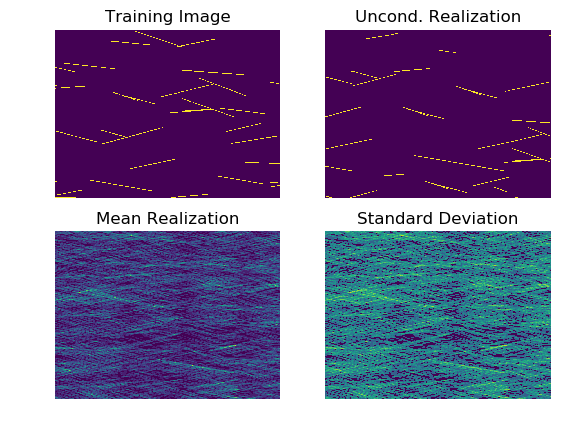

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

In [23]:
#Plot realization
subplot(2,2,1)
plotImage(TI_prim)
axis("off")
title("Training Image")
subplot(2,2,2)
plotImage(binary_uncond[1][:,:,1])
axis("off")
title("Uncond. Realization")
subplot(2,2,3)
plotImage(binary_uncond_mean)
axis("off")
title("Mean Realization")
subplot(2,2,4)
plotImage(binary_uncond_stdev)
axis("off")
title("Standard Deviation")
;

The next four cells do the same thing as the previous four, but with the proximity-transformed training image.

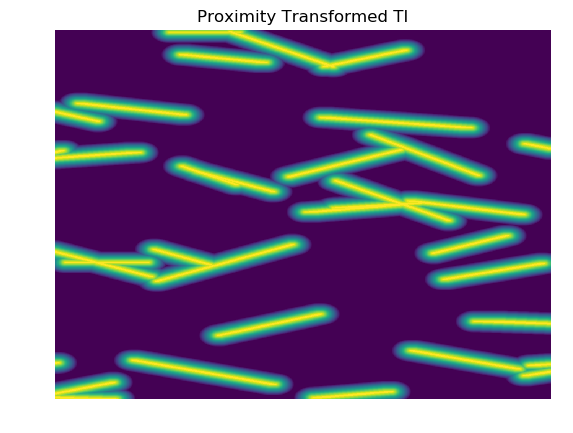

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

In [24]:
#Plot proximity transform training image
plotImage(TI_prox);
title("Proximity Transformed TI");
axis("off");

In [25]:
#  Perform test IQ Simulation on proximity-transformed image
t_prox_uncond=[120 120 1]
prox_uncond = uncond_iqsim2d(TI_prox, t_prox_uncond, n);
prox_uncond_mean, prox_uncond_stdev=realizationStats(prox_uncond);

INFO: using GPU Turks


In [26]:
#  Save simulation
collectSimulation(prox_uncond,TI_prox,t_prox_uncond,saveSim=true,savename="Simulations/prox_uncond_sim");

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

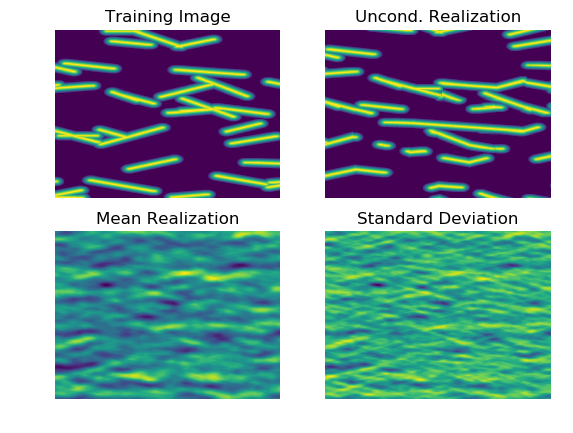

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

In [27]:
#  Plot realization
subplot(2,2,1)
plotImage(TI_prox)
axis("off")
title("Training Image")
subplot(2,2,2)
plotImage(prox_uncond[1][:,:,1])
axis("off")
title("Uncond. Realization")
subplot(2,2,3)
plotImage(prox_uncond_mean)
axis("off")
title("Mean Realization")
subplot(2,2,4)
plotImage(prox_uncond_stdev)
axis("off")
title("Standard Deviation")
;

**Brief Discussion**

This image quilting technique is really incredible. I can't believe how fast it is and how it produces much more visually appealing images than typical MPS simulations. One slightly concerning observation is that this algorithm, at least with this template size, sometimes produces much longer fractures than the training image contains. I have a feeling this is a template size phenomenon but nonetheless something worth noting. Also, the algorithm works basically the same for data with and without the proximity transform.  

# 2. Template Size Testing

In this next part we examine the effect of template size on the unconditional realizations. We begin by simply generating some realizations for a visual analysis.

In [10]:
#Define template sizes
templSizes=[51 51 1; 76 76 1; 101 101 1; 201 201 1];

In [11]:
#Template size test without proximity transform
binary_templSizeTest=templSizeTest(TI_prim,templSizes,10);

#With proximity transform
prox_templSizeTest=templSizeTest(TI_prox,templSizes,10);

Simulating Template 1 of 4


INFO: using GPU Turks


Simulating Template 2 of 4


INFO: using GPU Turks


Simulating Template 3 of 4


INFO: using GPU Turks


Simulating Template 4 of 4


INFO: using GPU Turks


Simulating Template 1 of 4


INFO: using GPU Turks


Simulating Template 2 of 4


INFO: using GPU Turks


Simulating Template 3 of 4


INFO: using GPU Turks


Simulating Template 4 of 4


INFO: using GPU Turks


In [12]:
#Save binary template size test
collectSimulation(binary_templSizeTest,TI_prim,templSizes,saveSim=true,savename="Simulations/binary_uncond_templSizeTest")

Dict{String,Any} with 6 entries:
  "Realizations"     => Array{Array{Float64,3},1}[Array{Float64,3}[[0.0 0.0 … 0…
  "PrimaryTI"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.…
  "SecondaryTI"      => false
  "Reference"        => false
  "TemplateSize"     => [51 51 1; 76 76 1; 101 101 1; 201 201 1]
  "SoftConditioning" => false

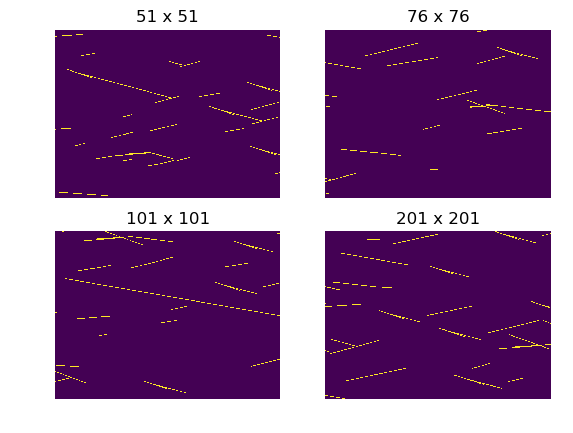

In [13]:
#Plot template size test results (realization 1) for binary
titles=["51 x 51", "76 x 76", "101 x 101", "201 x 201"]
for i=1:4
    subplot(2,2,i)
    plotImage(binary_templSizeTest[i][1][:,:,1])
    axis("off")
    title(titles[i])
end

In [14]:
#Save proximity template size test
collectSimulation(prox_templSizeTest,TI_prox,templSizes,saveSim=true,savename="Simulations/prox_uncond_templSizeTest")

Dict{String,Any} with 6 entries:
  "Realizations"     => Array{Array{Float64,3},1}[Array{Float64,3}[[0.0 0.0 … 0…
  "PrimaryTI"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.9 0.9 … 0.…
  "SecondaryTI"      => false
  "Reference"        => false
  "TemplateSize"     => [51 51 1; 76 76 1; 101 101 1; 201 201 1]
  "SoftConditioning" => false

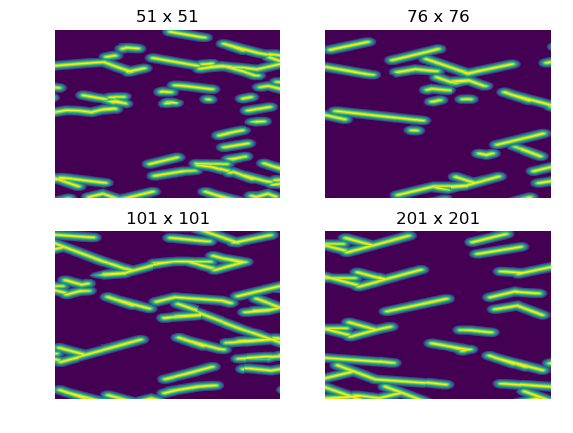

In [15]:
#Plot template size test results for proximity transform
for i=1:4
    subplot(2,2,i)
    plotImage(prox_templSizeTest[i][1][:,:,1])
    axis("off")
    title(titles[i])
end

We can go further and actually quantitatively assess what template size we should be using by analyzing voxel reuse plots. These plots show the mean number of voxels that are not overwritten in each simulation. The template sizes yielding the highest mean voxel reuse are the best template sizes to use. 

In [16]:
vr1=voxelreuseplot(
    TI_prim,
    label="Binary Unconditional",
    gpu=true, 
    tmin=100, tmax=300)

INFO: using GPU Turks
Progress:   0%|                                         |  ETA: 1:28:56INFO: using GPU Turks
Progress:   1%|                                         |  ETA: 1:28:02INFO: using GPU Turks
Progress:   1%|█                                        |  ETA: 1:27:20INFO: using GPU Turks
Progress:   2%|█                                        |  ETA: 1:27:01INFO: using GPU Turks
Progress:   2%|█                                        |  ETA: 1:26:29INFO: using GPU Turks
Progress:   3%|█                                        |  ETA: 1:26:05INFO: using GPU Turks
Progress:   3%|█                                        |  ETA: 1:25:41INFO: using GPU Turks
Progress:   4%|██                                       |  ETA: 1:25:18INFO: using GPU Turks
Progress:   4%|██                                       |  ETA: 1:24:53INFO: using GPU Turks
Progress:   5%|██                                       |  ETA: 1:24:33INFO: using GPU Turks
Progress:   5%|██                               

Progress:  33%|█████████████                            |  ETA: 1:08:38INFO: using GPU Turks
Progress:  33%|██████████████                           |  ETA: 1:08:21INFO: using GPU Turks
Progress:  34%|██████████████                           |  ETA: 1:08:04INFO: using GPU Turks
Progress:  34%|██████████████                           |  ETA: 1:07:48INFO: using GPU Turks
Progress:  35%|██████████████                           |  ETA: 1:07:33INFO: using GPU Turks
Progress:  35%|██████████████                           |  ETA: 1:07:17INFO: using GPU Turks
Progress:  36%|███████████████                          |  ETA: 1:07:01INFO: using GPU Turks
Progress:  36%|███████████████                          |  ETA: 1:06:56INFO: using GPU Turks
Progress:  37%|███████████████                          |  ETA: 1:06:37INFO: using GPU Turks
Progress:  37%|███████████████                          |  ETA: 1:06:17INFO: using GPU Turks
Progress:  38%|████████████████                         |  ETA: 1:05:5

Progress:  65%|███████████████████████████              |  ETA: 0:48:09INFO: using GPU Turks
Progress:  66%|███████████████████████████              |  ETA: 0:47:45INFO: using GPU Turks
Progress:  66%|███████████████████████████              |  ETA: 0:47:21INFO: using GPU Turks
Progress:  67%|███████████████████████████              |  ETA: 0:46:56INFO: using GPU Turks
Progress:  67%|████████████████████████████             |  ETA: 0:46:30INFO: using GPU Turks
Progress:  68%|████████████████████████████             |  ETA: 0:46:06INFO: using GPU Turks
Progress:  68%|████████████████████████████             |  ETA: 0:45:41INFO: using GPU Turks
Progress:  69%|████████████████████████████             |  ETA: 0:45:15INFO: using GPU Turks
Progress:  69%|████████████████████████████             |  ETA: 0:44:49INFO: using GPU Turks
Progress:  70%|█████████████████████████████            |  ETA: 0:44:22INFO: using GPU Turks
Progress:  70%|█████████████████████████████            |  ETA: 0:43:5

Progress:  98%|████████████████████████████████████████ |  ETA: 0:05:16INFO: using GPU Turks
Progress:  98%|████████████████████████████████████████ |  ETA: 0:04:15INFO: using GPU Turks
Progress:  99%|████████████████████████████████████████ |  ETA: 0:03:13INFO: using GPU Turks
Progress:  99%|█████████████████████████████████████████|  ETA: 0:02:09INFO: using GPU Turks
Progress: 100%|█████████████████████████████████████████|  ETA: 0:01:05INFO: using GPU Turks
Progress: 100%|█████████████████████████████████████████| Time: 3:39:38


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 90 
 
 
 120 
 
 
 150 
 
 
 180 
 
 
 210 
 
 
 240 
 
 
 270 
 
 
 300 
 
 
 0.90 
 
 
 0.92 
 
 
 0.94 
 
 
 0.96 
 
 
 Template size 
 
 
 Voxel reuse 
 
 
 
<polygon clip-path="url(#clip8102)" points="
79.9322,149.81 82.4342,161.328 84.9361,155.572 87.438,155.991 89.9399,143.625 92.4418,148.451 94.9437,139.218 97.4456,155.085 99.9476,143.251 102.449,140.301 
 104.951,155.251 107.453,130.834 109.955,136.417 112.457,129.784 114.959,136.854 117.461,134.857 119.963,125.125 122.465,135.729 124.967,126.834 127.469,131.32 
 129.971,134.645 132.472,116.412 134.974,128.532 137.476,114.472 139.978,114.178 142.48,118.771 144.982,132.538 147.484,114.797 149.986,109.895 152.488,107.773 
 154.99,102.46 157.492,111.243 159.993,113.198 162.495,111.932 164.997,100.884 167.499,103.87 170.001,105.794 172.503,96.8224 175.005,106.364 177.507,97.9324 
 180.009,110.785 182.511,100.417 185.013,100.511 187.515,90.4539 190.016,110.014 192.518,97.0499 195.02,100.902 197.522,93.4168 200.024,99.7873 202.526,106.367 
 205.028,97.8999 207.53,82.6545 210.032,86.2274 212.534,104.381 215.036,90.5322 217.537,104.242 220.039,95.797 222.541,99.1695 225.043,93.4998 227.545,108.683 
 230.047,95.0076 232.549,82.9379 235.051,86.5741 237.553,76.3679 240.055,74.8199 242.557,81.998 245.059,81.0294 247.56,85.753 250.062,77.3036 252.564,78.2571 
 255.066,74.0636 257.568,75.0951 260.07,100.456 262.572,81.6816 265.074,85.4165 267.576,72.2632 270.078,81.0379 272.58,72.3279 275.082,74.2999 277.583,75.549 
 280.085,83.2498 282.587,79.1556 285.089,71.8103 287.591,79.7198 290.093,67.6836 292.595,64.0396 295.097,65.1895 297.599,84.4072 300.101,67.1891 302.603,79.7671 
 305.104,67.9115 307.606,65.3222 310.108,73.051 312.61,78.0508 315.112,74.2967 317.614,70.2229 320.116,62.7095 322.618,68.4371 325.12,72.4855 327.622,62.4013 
 330.124,64.2266 332.626,68.1043 335.127,65.5683 337.629,77.126 340.131,58.9598 342.633,58.2087 345.135,59.6934 347.637,52.1002 350.139,52.3273 352.641,66.883 
 355.143,62.5669 357.645,71.7574 360.147,54.6992 362.648,48.3426 365.15,53.252 367.652,68.7004 370.154,69.1271 372.656,52.0449 375.158,52.0131 377.66,55.2237 
 380.162,53.5066 382.664,52.874 385.166,53.9957 387.668,56.479 390.17,53.1617 392.671,63.7624 395.173,63.8205 397.675,43.868 400.177,50.8086 402.679,46.5962 
 405.181,47.9125 407.683,61.5606 410.185,50.5645 412.687,50.6806 415.189,78.9821 417.691,56.9344 420.192,53.2216 422.694,47.1159 425.196,39.4744 427.698,44.1917 
 430.2,55.0487 432.702,43.9339 435.204,47.123 437.706,60.7604 440.208,56.2437 442.71,43.6548 445.212,46.1214 447.714,53.6024 450.215,37.0345 452.717,46.3677 
 455.219,55.9127 457.721,46.1316 460.223,50.3068 462.725,41.4054 465.227,49.7917 467.729,51.4371 470.231,48.7484 472.733,59.4403 475.235,46.2643 477.737,43.8825 
 480.238,61.4376 482.74,48.3572 485.242,46.4103 487.744,46.5467 490.246,43.1981 492.748,36.8309 495.25,43.9637 497.752,51.1253 500.254,48.7909 502.756,45.2492 
 505.258,49.7661 507.759,41.1528 510.261,39.126 512.763,50.1583 515.265,48.2151 517.767,50.2037 520.269,48.7083 522.771,62.9988 525.273,50.0238 527.775,53.0359 
 530.277,68.1225 532.779,46.9672 535.281,46.5776 537.782,39.9352 540.284,35.5676 542.786,44.8505 545.288,35.4744 547.79,45.0781 550.292,38.7694 552.794,37.5255 
 555.296,47.0169 557.798,46.8372 560.3,31.2728 562.802,33.2188 565.303,46.5164 567.805,49.8734 570.307,44.8813 572.809,34.7102 575.311,48.7802 577.813,44.0383 
 580.315,34.7996 580.315,17.1609 577.813,20.1486 575.311,20.9074 572.809,20.0586 570.307,21.0245 567.805,15.1758 565.303,16.6926 562.802,22.1454 560.3,13.0098 
 557.798,27.8538 555.296,11.811 552.794,15.9682 550.292,18.4308 547.79,21.5671 545.288,16.8146 542.786,24.7304 540.284,20.0335 537.782,21.3113 535.281,23.6522 
 532.779,27.2478 530.277,21.046 527.775,30.0305 525.273,18.7701 522.771,21.0367 520.269,27.8134 517.767,23.485 515.265,24.6565 512.763,21.3116

In [17]:
vr2=voxelreuseplot(
    TI_prim,
    label="Binary with Auxiliary",
    gpu=true, 
    soft=[(R_aux,TI_aux)],
    tmin=100, tmax=250,
    overlapx=1/10, overlapy=1/10)

INFO: using GPU Turks
Progress:   1%|                                         |  ETA: 1:48:00INFO: using GPU Turks
Progress:   1%|█                                        |  ETA: 1:48:28INFO: using GPU Turks
Progress:   2%|█                                        |  ETA: 1:46:54INFO: using GPU Turks
Progress:   3%|█                                        |  ETA: 1:47:53INFO: using GPU Turks
Progress:   3%|█                                        |  ETA: 1:46:28INFO: using GPU Turks
Progress:   4%|██                                       |  ETA: 1:45:24INFO: using GPU Turks
Progress:   5%|██                                       |  ETA: 1:44:18INFO: using GPU Turks
Progress:   5%|██                                       |  ETA: 1:43:19INFO: using GPU Turks
Progress:   6%|██                                       |  ETA: 1:42:43INFO: using GPU Turks
Progress:   7%|███                                      |  ETA: 1:42:02INFO: using GPU Turks
Progress:   7%|███                              

Progress:  44%|██████████████████                       |  ETA: 1:02:22INFO: using GPU Turks
Progress:  44%|██████████████████                       |  ETA: 1:01:39INFO: using GPU Turks
Progress:  45%|██████████████████                       |  ETA: 1:00:57INFO: using GPU Turks
Progress:  46%|███████████████████                      |  ETA: 1:00:14INFO: using GPU Turks
Progress:  46%|███████████████████                      |  ETA: 0:59:31INFO: using GPU Turks
Progress:  47%|███████████████████                      |  ETA: 0:58:48INFO: using GPU Turks
Progress:  48%|████████████████████                     |  ETA: 0:58:07INFO: using GPU Turks
Progress:  48%|████████████████████                     |  ETA: 0:57:25INFO: using GPU Turks
Progress:  49%|████████████████████                     |  ETA: 0:56:42INFO: using GPU Turks
Progress:  50%|████████████████████                     |  ETA: 0:56:00INFO: using GPU Turks
Progress:  50%|█████████████████████                    |  ETA: 0:55:1

Progress:  87%|████████████████████████████████████     |  ETA: 0:15:36INFO: using GPU Turks
Progress:  87%|████████████████████████████████████     |  ETA: 0:14:50INFO: using GPU Turks
Progress:  88%|████████████████████████████████████     |  ETA: 0:14:05INFO: using GPU Turks
Progress:  89%|████████████████████████████████████     |  ETA: 0:13:20INFO: using GPU Turks
Progress:  89%|█████████████████████████████████████    |  ETA: 0:12:34INFO: using GPU Turks
Progress:  90%|█████████████████████████████████████    |  ETA: 0:11:48INFO: using GPU Turks
Progress:  91%|█████████████████████████████████████    |  ETA: 0:11:02INFO: using GPU Turks
Progress:  91%|█████████████████████████████████████    |  ETA: 0:10:16INFO: using GPU Turks
Progress:  92%|██████████████████████████████████████   |  ETA: 0:09:29INFO: using GPU Turks
Progress:  93%|██████████████████████████████████████   |  ETA: 0:08:43INFO: using GPU Turks
Progress:  93%|██████████████████████████████████████   |  ETA: 0:07:5

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 100 
 
 
 150 
 
 
 200 
 
 
 250 
 
 
 0.86 
 
 
 0.88 
 
 
 0.90 
 
 
 0.92 
 
 
 0.94 
 
 
 Template size 
 
 
 Voxel reuse 
 
 
 
<polygon clip-path="url(#clip8302)" points="
87.7507,202.308 91.0345,180.88 94.3182,181.573 97.602,183.136 100.886,193.624 104.17,176.794 107.453,184.013 110.737,185.885 114.021,189.653 117.305,185.965 
 120.588,189.156 123.872,167.394 127.156,165.686 130.44,159.423 133.723,155.762 137.007,169.946 140.291,171.402 143.575,168.538 146.858,175.229 150.142,160.494 
 153.426,163.592 156.71,143.776 159.993,131.584 163.277,146.017 166.561,145.756 169.845,150.384 173.129,144.535 176.412,137.864 179.696,149.175 182.98,146.464 
 186.264,145.332 189.547,121.604 192.831,137.562 196.115,127.517 199.399,162.28 202.682,142.761 205.966,161.007 209.25,180.774 212.534,181.271 215.817,182.23 
 219.101,197.72 222.385,145.355 225.669,154.726 228.952,152.722 232.236,149.356 235.52,167.917 238.804,130.784 242.088,127.993 245.371,186.368 248.655,140.931 
 251.939,139.396 255.223,140.694 258.506,150.076 261.79,154.464 265.074,154.312 268.358,127.143 271.641,103.898 274.925,80.3317 278.209,101.095 281.493,117.91 
 284.776,83.7801 288.06,78.7217 291.344,74.3255 294.628,96.4379 297.911,99.3854 301.195,120.303 304.479,99.5006 307.763,85.7059 311.047,123.848 314.33,113.709 
 317.614,96.8163 320.898,104.816 324.182,99.5146 327.465,95.3798 330.749,87.8671 334.033,94.9964 337.317,92.5163 340.6,111.544 343.884,99.2359 347.168,103.374 
 350.452,124.755 353.735,87.2979 357.019,89.426 360.303,97.4917 363.587,75.3391 366.87,82.8777 370.154,109.73 373.438,100.866 376.722,69.0139 380.006,79.9659 
 383.289,107.684 386.573,73.954 389.857,75.8261 393.141,79.4072 396.424,58.3165 399.708,73.7787 402.992,89.4816 406.276,72.6308 409.559,85.486 412.843,83.0085 
 416.127,86.3046 419.411,80.1883 422.694,64.5108 425.978,84.0593 429.262,92.8811 432.546,67.8555 435.829,71.689 439.113,76.0687 442.397,75.107 445.681,75.8095 
 448.964,76.1011 452.248,66.4666 455.532,79.9102 458.816,65.5026 462.1,62.8385 465.383,64.9752 468.667,59.4109 471.951,53.735 475.235,69.3151 478.518,64.3224 
 481.802,53.2976 485.086,52.0604 488.37,51.0003 491.653,49.024 494.937,60.226 498.221,57.5658 501.505,55.2733 504.788,56.2799 508.072,46.0184 511.356,58.1232 
 514.64,63.2619 517.923,43.4008 521.207,48.9432 524.491,44.3796 527.775,45.077 531.059,56.176 534.342,47.525 537.626,48.8477 540.91,48.6144 544.194,54.2672 
 547.477,44.0011 550.761,35.6679 554.045,41.3026 557.329,37.1059 560.612,36.7068 563.896,38.2265 567.18,36.0554 570.464,38.9469 573.747,47.1243 577.031,41.0438 
 580.315,39.3284 580.315,21.2955 577.031,21.6449 573.747,25.2718 570.464,17.4917 567.18,18.9914 563.896,17.1374 560.612,14.5671 557.329,18.2254 554.045,11.811 
 550.761,21.5687 547.477,23.5505 544.194,23.1742 540.91,28.4952 537.626,31.117 534.342,26.8336 531.059,31.4084 527.775,29.9747 524.491,24.5321 521.207,32.0522 
 517.923,27.4108 514.64,41.0795 511.356,38.8037 508.072,34.0054 504.788,33.3694 501.505,35.2746 498.221,44.0797 494.937,34.854 491.653,32.449 488.37,37.8763 
 485.086,38.3228 481.802,36.0559 478.518,32.8987 475.235,43.5641 471.951,43.8294 468.667,44.361 465.383,49.7764 462.1,47.739 458.816,44.45 455.532,54.6181 
 452.248,53.9947 448.964,55.2132 445.681,53.2735 442.397,48.1576 439.113,56.035 435.829,58.8421 432.546,48.602 429.262,48.6753 425.978,48.2292 422.694,51.1831 
 419.411,51.4441 416.127,67.4654 412.843,59.0336 409.559,59.7095 406.276,55.1281 402.992,57.4654 399.708,47.8473 396.424,44.0007 393.141,43.2416 389.857,48.0465 
 386.573,44.8043 383.289,30.8939 380.006,57.4842 376.722,51.0761 373.438,46.8286 370.154,54.5766 366.87,58.5969 363.587,58.3964 360.303,51.1333 357.019,56.2497 
 353.735,53.0335 350.452,53.7626 347.168,76.0881 343.884,63.1553 340.6,64.329 337.317,63.402 334.033,71.5565 330.749,60.1573 327.465,68.72 324.182,64.1319 
 320.898,66.2406 317.614,69.7844 314.

In [18]:
vr3=voxelreuseplot(
    TI_prox,
    label="Prox. Unconditional",
    gpu=true, 
    tmin=25, tmax=175)

INFO: using GPU Turks
Progress:   1%|                                         |  ETA: 1:02:17INFO: using GPU Turks
Progress:   1%|█                                        |  ETA: 1:01:52INFO: using GPU Turks
Progress:   2%|█                                        |  ETA: 1:01:15INFO: using GPU Turks
Progress:   3%|█                                        |  ETA: 1:00:42INFO: using GPU Turks
Progress:   3%|█                                        |  ETA: 1:00:18INFO: using GPU Turks
Progress:   4%|██                                       |  ETA: 0:59:53INFO: using GPU Turks
Progress:   5%|██                                       |  ETA: 0:59:28INFO: using GPU Turks
Progress:   5%|██                                       |  ETA: 0:59:06INFO: using GPU Turks
Progress:   6%|██                                       |  ETA: 0:58:39INFO: using GPU Turks
Progress:   7%|███                                      |  ETA: 0:58:11INFO: using GPU Turks
Progress:   7%|███                              

Progress:  44%|██████████████████                       |  ETA: 0:35:34INFO: using GPU Turks
Progress:  44%|██████████████████                       |  ETA: 0:35:09INFO: using GPU Turks
Progress:  45%|██████████████████                       |  ETA: 0:34:45INFO: using GPU Turks
Progress:  46%|███████████████████                      |  ETA: 0:34:21INFO: using GPU Turks
Progress:  46%|███████████████████                      |  ETA: 0:33:57INFO: using GPU Turks
Progress:  47%|███████████████████                      |  ETA: 0:33:33INFO: using GPU Turks
Progress:  48%|████████████████████                     |  ETA: 0:33:09INFO: using GPU Turks
Progress:  48%|████████████████████                     |  ETA: 0:32:46INFO: using GPU Turks
Progress:  49%|████████████████████                     |  ETA: 0:32:22INFO: using GPU Turks
Progress:  50%|████████████████████                     |  ETA: 0:31:58INFO: using GPU Turks
Progress:  50%|█████████████████████                    |  ETA: 0:31:3

Progress:  87%|████████████████████████████████████     |  ETA: 0:09:04INFO: using GPU Turks
Progress:  87%|████████████████████████████████████     |  ETA: 0:08:37INFO: using GPU Turks
Progress:  88%|████████████████████████████████████     |  ETA: 0:08:11INFO: using GPU Turks
Progress:  89%|████████████████████████████████████     |  ETA: 0:07:45INFO: using GPU Turks
Progress:  89%|█████████████████████████████████████    |  ETA: 0:07:18INFO: using GPU Turks
Progress:  90%|█████████████████████████████████████    |  ETA: 0:06:52INFO: using GPU Turks
Progress:  91%|█████████████████████████████████████    |  ETA: 0:06:25INFO: using GPU Turks
Progress:  91%|█████████████████████████████████████    |  ETA: 0:05:59INFO: using GPU Turks
Progress:  92%|██████████████████████████████████████   |  ETA: 0:05:32INFO: using GPU Turks
Progress:  93%|██████████████████████████████████████   |  ETA: 0:05:05INFO: using GPU Turks
Progress:  93%|██████████████████████████████████████   |  ETA: 0:04:3

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 40 
 
 
 60 
 
 
 80 
 
 
 100 
 
 
 120 
 
 
 140 
 
 
 160 
 
 
 0.70 
 
 
 0.75 
 
 
 0.80 
 
 
 0.85 
 
 
 0.90 
 
 
 0.95 
 
 
 Template size 
 
 
 Voxel reuse 
 
 
 
<polygon clip-path="url(#clip8502)" points="
63.5263,284.325 66.9715,306.873 70.4168,304.695 73.862,237.363 77.3073,262.936 80.7525,274.134 84.1978,213.834 87.6431,201.818 91.0883,200.628 94.5336,190.218 
 97.9788,203.093 101.424,234.226 104.869,174.851 108.315,186.312 111.76,144.715 115.205,213.574 118.65,294.158 122.096,177.974 125.541,182.594 128.986,196.068 
 132.431,217.667 135.877,292.837 139.322,186.269 142.767,222.894 146.212,147.193 149.658,305.327 153.103,239.444 156.548,141.093 159.993,185.258 163.439,224.051 
 166.884,161.174 170.329,115.903 173.775,204.74 177.22,259.646 180.665,163.617 184.11,233.48 187.556,179.486 191.001,124.21 194.446,154.969 197.891,200.342 
 201.337,149.999 204.782,184.882 208.227,179.861 211.672,278.818 215.118,140.693 218.563,134.335 222.008,181.681 225.453,203.726 228.899,226.923 232.344,219.432 
 235.789,133.073 239.234,271.781 242.68,163.352 246.125,223.678 249.57,205.075 253.015,174.765 256.461,204.714 259.906,164.88 263.351,216.228 266.796,182.633 
 270.242,224.474 273.687,164.635 277.132,169.784 280.578,160.544 284.023,182.23 287.468,172.612 290.913,160.279 294.359,200.516 297.804,170.199 301.249,137.265 
 304.694,168.638 308.14,152.683 311.585,163.342 315.03,167.376 318.475,122.186 321.921,242.504 325.366,191.89 328.811,151.097 332.256,182.238 335.702,151.529 
 339.147,242.097 342.592,137.258 346.037,142.109 349.483,150.582 352.928,213.654 356.373,170.462 359.818,243.665 363.264,239.986 366.709,220.028 370.154,220.476 
 373.599,110.772 377.045,106.561 380.49,153.415 383.935,199.704 387.381,172.094 390.826,132.436 394.271,184.988 397.716,197.516 401.162,144.052 404.607,199.454 
 408.052,189.16 411.497,192.818 414.943,175.183 418.388,219.085 421.833,183.164 425.278,183.979 428.724,170.314 432.169,197.989 435.614,205.082 439.059,250.714 
 442.505,260.583 445.95,254.203 449.395,183.515 452.84,200.788 456.286,190.232 459.731,148.41 463.176,205.43 466.621,180.971 470.067,247.868 473.512,194.163 
 476.957,180.801 480.402,253.241 483.848,240.446 487.293,107.095 490.738,284.345 494.184,171.24 497.629,245.274 501.074,173.56 504.519,216.926 507.965,180.269 
 511.41,196.839 514.855,194.061 518.3,147.109 521.746,173.326 525.191,213.117 528.636,237.236 532.081,187.387 535.527,230.666 538.972,216.962 542.417,190.905 
 545.862,170.333 549.308,205.79 552.753,194.605 556.198,230.564 559.643,234.329 563.089,187.683 566.534,271.394 569.979,203.149 573.424,186.266 576.87,205.384 
 580.315,240.13 580.315,83.6541 576.87,72.8022 573.424,61.0525 569.979,66.8286 566.534,27.9496 563.089,66.1611 559.643,61.369 556.198,69.7691 552.753,75.6058 
 549.308,95.7716 545.862,78.6171 542.417,57.2469 538.972,70.0891 535.527,56.1746 532.081,83.6232 528.636,70.9028 525.191,39.3461 521.746,38.5089 518.3,64.3868 
 514.855,54.8219 511.41,62.2264 507.965,33.6665 504.519,47.01 501.074,46.6377 497.629,84.319 494.184,50.256 490.738,73.6376 487.293,33.3986 483.848,94.3536 
 480.402,73.6781 476.957,50.289 473.512,72.4204 470.067,65.4417 466.621,41.21 463.176,51.469 459.731,54.748 456.286,64.1347 452.84,75.5088 449.395,56.1124 
 445.95,71.2102 442.505,63.1532 439.059,59.2052 435.614,82.9316 432.169,45.9462 428.724,78.6475 425.278,38.6159 421.833,90.0071 418.388,50.2611 414.943,38.1936 
 411.497,65.157 408.052,60.7768 404.607,47.3677 401.162,58.3436 397.716,73.3088 394.271,44.0167 390.826,65.0519 387.381,53.8638 383.935,59.2355 380.49,41.8773 
 377.045,38.9094 373.599,37.1956 370.154,64.0229 366.709,94.6514 363.264,105.794 359.818,33.864 356.373,59.1823 352.928,55.2261 349.483,54.248 346.037,42.4443 
 342.592,40.8444 339.147,50.7833 335.702,37.3806 332.256,35.1358 328.811,40.3695 325.366,27.5469 321.921,66.8878 318.475,50.0541 315.03

In [19]:
vr4=voxelreuseplot(
    TI_prox,
    label="Prox. with Auxiliary",
    gpu=true, 
    soft=[(R_aux,TI_aux)],
    tmin=50, tmax=250,
    overlapx=1/10, overlapy=1/10)

INFO: using GPU Turks
Progress:   0%|                                         |  ETA: 2:21:39INFO: using GPU Turks
Progress:   1%|                                         |  ETA: 2:21:29INFO: using GPU Turks
Progress:   1%|█                                        |  ETA: 2:21:50INFO: using GPU Turks
Progress:   2%|█                                        |  ETA: 2:21:07INFO: using GPU Turks
Progress:   2%|█                                        |  ETA: 2:20:01INFO: using GPU Turks
Progress:   3%|█                                        |  ETA: 2:19:32INFO: using GPU Turks
Progress:   3%|█                                        |  ETA: 2:19:24INFO: using GPU Turks
Progress:   4%|██                                       |  ETA: 2:18:42INFO: using GPU Turks
Progress:   4%|██                                       |  ETA: 2:17:56INFO: using GPU Turks
Progress:   5%|██                                       |  ETA: 2:17:22INFO: using GPU Turks
Progress:   5%|██                               

Progress:  33%|█████████████                            |  ETA: 1:37:01INFO: using GPU Turks
Progress:  33%|██████████████                           |  ETA: 1:36:19INFO: using GPU Turks
Progress:  34%|██████████████                           |  ETA: 1:35:39INFO: using GPU Turks
Progress:  34%|██████████████                           |  ETA: 1:34:58INFO: using GPU Turks
Progress:  35%|██████████████                           |  ETA: 1:34:17INFO: using GPU Turks
Progress:  35%|██████████████                           |  ETA: 1:33:35INFO: using GPU Turks
Progress:  36%|███████████████                          |  ETA: 1:32:55INFO: using GPU Turks
Progress:  36%|███████████████                          |  ETA: 1:32:14INFO: using GPU Turks
Progress:  37%|███████████████                          |  ETA: 1:31:33INFO: using GPU Turks
Progress:  37%|███████████████                          |  ETA: 1:30:51INFO: using GPU Turks
Progress:  38%|████████████████                         |  ETA: 1:30:1

Progress:  65%|███████████████████████████              |  ETA: 0:51:57INFO: using GPU Turks
Progress:  66%|███████████████████████████              |  ETA: 0:51:15INFO: using GPU Turks
Progress:  66%|███████████████████████████              |  ETA: 0:50:33INFO: using GPU Turks
Progress:  67%|███████████████████████████              |  ETA: 0:49:51INFO: using GPU Turks
Progress:  67%|████████████████████████████             |  ETA: 0:49:09INFO: using GPU Turks
Progress:  68%|████████████████████████████             |  ETA: 0:48:27INFO: using GPU Turks
Progress:  68%|████████████████████████████             |  ETA: 0:47:45INFO: using GPU Turks
Progress:  69%|████████████████████████████             |  ETA: 0:47:02INFO: using GPU Turks
Progress:  69%|████████████████████████████             |  ETA: 0:46:21INFO: using GPU Turks
Progress:  70%|█████████████████████████████            |  ETA: 0:45:38INFO: using GPU Turks
Progress:  70%|█████████████████████████████            |  ETA: 0:44:5

Progress:  98%|████████████████████████████████████████ |  ETA: 0:04:03INFO: using GPU Turks
Progress:  98%|████████████████████████████████████████ |  ETA: 0:03:15INFO: using GPU Turks
Progress:  99%|████████████████████████████████████████ |  ETA: 0:02:26INFO: using GPU Turks
Progress:  99%|█████████████████████████████████████████|  ETA: 0:01:38INFO: using GPU Turks
Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:49INFO: using GPU Turks
Progress: 100%|█████████████████████████████████████████| Time: 2:44:06


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 50 
 
 
 100 
 
 
 150 
 
 
 200 
 
 
 250 
 
 
 0.5 
 
 
 0.6 
 
 
 0.7 
 
 
 0.8 
 
 
 Template size 
 
 
 Voxel reuse 
 
 
 
<polygon clip-path="url(#clip8702)" points="
61.2004,242.477 63.796,320.033 66.3915,208.042 68.9871,256.186 71.5827,244.342 74.1783,260.038 76.7738,174.453 79.3694,188.007 81.965,247.14 84.5605,263.112 
 87.1561,272.838 89.7517,226.433 92.3473,205.007 94.9428,220.321 97.5384,230.122 100.134,262.735 102.73,154.728 105.325,223.658 107.921,253.186 110.516,291.826 
 113.112,210.23 115.707,236.53 118.303,226.041 120.899,210.566 123.494,192.936 126.09,199.36 128.685,193.29 131.281,169.233 133.876,186.682 136.472,205.112 
 139.068,175.779 141.663,159.123 144.259,163.831 146.854,189.788 149.45,184.5 152.045,177.558 154.641,223.33 157.237,200.322 159.832,209.229 162.428,213.313 
 165.023,196.91 167.619,214.204 170.214,218.562 172.81,209.016 175.406,147.15 178.001,168.793 180.597,183.562 183.192,167.128 185.788,189.758 188.383,165.248 
 190.979,144.857 193.575,149.658 196.17,136.605 198.766,157.34 201.361,145.515 203.957,137.899 206.552,187.204 209.148,143.415 211.744,139.574 214.339,168.387 
 216.935,157.247 219.53,128.51 222.126,161.47 224.721,192.186 227.317,142.528 229.913,151.789 232.508,154.09 235.104,163.856 237.699,148.26 240.295,168.26 
 242.89,177.197 245.486,158.416 248.082,163.18 250.677,208.449 253.273,168.953 255.868,180.135 258.464,184.448 261.059,181.888 263.655,196.789 266.251,228.849 
 268.846,259.149 271.442,195.391 274.037,264.678 276.633,176.994 279.229,169.396 281.824,210.059 284.42,200.99 287.015,198.509 289.611,201.63 292.206,175.077 
 294.802,216.751 297.398,190.838 299.993,156.726 302.589,149.731 305.184,168.141 307.78,137.929 310.375,129.842 312.971,127.572 315.567,171.745 318.162,197.224 
 320.758,173.903 323.353,194.842 325.949,128.661 328.544,173.61 331.14,130.718 333.736,125.385 336.331,140.355 338.927,179.644 341.522,176.71 344.118,196.813 
 346.713,185.613 349.309,146.595 351.905,177.38 354.5,148.924 357.096,210.262 359.691,164.92 362.287,157.611 364.882,159.329 367.478,187.451 370.074,165.136 
 372.669,177.283 375.265,183.387 377.86,162.933 380.456,150.819 383.051,128.312 385.647,176.82 388.243,153.978 390.838,157.594 393.434,170.311 396.029,126.417 
 398.625,173.561 401.22,188.018 403.816,160.31 406.412,136.53 409.007,137.943 411.603,147.559 414.198,134.119 416.794,121.228 419.389,128.199 421.985,132.798 
 424.581,133.015 427.176,154.223 429.772,132.533 432.367,137.406 434.963,145.393 437.558,179.114 440.154,160.999 442.75,157.037 445.345,155.246 447.941,147.092 
 450.536,167.042 453.132,190.07 455.727,189.811 458.323,154.038 460.919,145.852 463.514,188.505 466.11,188.337 468.705,172.418 471.301,186.511 473.896,148.703 
 476.492,159.885 479.088,171.884 481.683,181.917 484.279,172.337 486.874,191.329 489.47,168.452 492.065,187.114 494.661,189.774 497.257,198.449 499.852,171.848 
 502.448,153.374 505.043,189.666 507.639,184.855 510.234,188.661 512.83,180.777 515.426,186.687 518.021,176.84 520.617,171.832 523.212,138.905 525.808,209.788 
 528.404,174.167 530.999,197.118 533.595,199.198 536.19,179.029 538.786,205.816 541.381,152.159 543.977,165.142 546.573,178.235 549.168,180.067 551.764,156.754 
 554.359,167.486 556.955,143.803 559.55,172.351 562.146,168.426 564.742,143.198 567.337,208.034 569.933,189.459 572.528,162.486 575.124,144.235 577.719,152.637 
 580.315,164.642 580.315,116.799 577.719,94.9627 575.124,101.116 572.528,134.188 569.933,123.665 567.337,85.2309 564.742,105.146 562.146,103.196 559.55,88.6477 
 556.955,92.7999 554.359,89.4875 551.764,98.7934 549.168,95.0347 546.573,114.499 543.977,99.8844 541.381,98.4202 538.786,112.619 536.19,140.772 533.595,110.298 
 530.999,123.925 528.404,111.75 525.808,134.219 523.212,116.976 520.617,99.3857 518.021,114.143 515.426,111.872 512.83,108.705 510.234,95.4843 507.639,119.163 
 505.043,111.066 502.448,93.1889 499.8

**Brief Discussion**

...

# 3. Using Secondary Data

Now we can begin the meat of the project. Here we will try to reproduce a fracture image based on some geophysical data. We use a Training Image primary/auxiliary pair and condition the realizations on another auxiliary data set. The goal is to reproduce the reference, or true, image. 

The geophysical data is from a Ground-Penetrating Radar (GPR) simulation of a fracture network. The simulation assumed that the fractures had an aperture of 8mm (or cm, I can't remember). The host rock is granitic and the fractures contain water. Up to this point the GPR data has been gained based on depth, migrated using a constant velocity model, and enveloped to smooth the image. This is a simple processing workflow as the processing is not the major focus of this work.

Below we perform conditional simulations, save the results, and show a summary of the results. We simulate both the binary image and the proximity-transformed image.

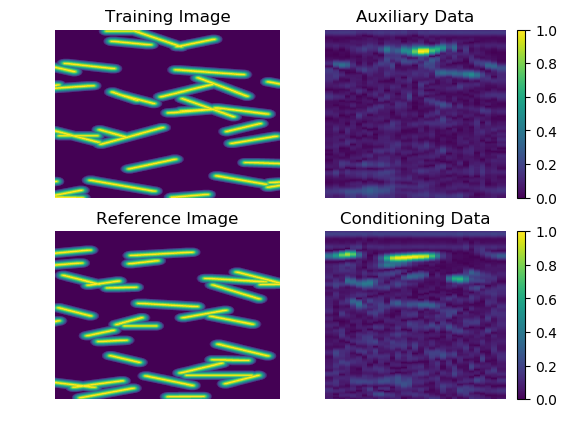

In [28]:
#Show training, conditioning, and reference images.
subplot(2,2,1)
plotImage(TI_prox[:,:,1])
axis("off")
title("Training Image")
subplot(2,2,2)
plotImage(TI_aux[:,:,1])
axis("off")
title("Auxiliary Data")
colorbar()
subplot(2,2,3)
plotImage(R_prox[:,:,1])
axis("off")
title("Reference Image")
subplot(2,2,4)
plotImage(R_aux[:,:,1])
axis("off")
title("Conditioning Data")
colorbar()
;

In [29]:
#Conditional image quilting simulation - no proximity transform
t_binary_cond=[250 250 1]
binary_cond=iqsim(
    TI_prim,
    t_binary_cond...,
    size(TI_prim)..., 
    soft=[(im2TI(R_aux),im2TI(TI_aux))],
    nreal=n,
    overlapx=1/10,overlapy=1/10,
    gpu=true)

#Conditional image quilting simulation with proximity transform
t_prox_cond=[160 160 1]
prox_cond=iqsim(
    TI_prox,
    t_prox_cond...,
    size(TI_prox)..., 
    soft=[(im2TI(R_aux),im2TI(TI_aux))],
    nreal=n,
    overlapx=1/10,overlapy=1/10,
    gpu=true)


#Compute mean & stdev of realizations
binary_cond_mean, binary_cond_stdev=realizationStats(binary_cond)
prox_cond_mean, prox_cond_stdev=realizationStats(prox_cond);

INFO: using GPU Turks
INFO: using GPU Turks


In [30]:
#Save binary conditional simulation
collectSimulation(
    binary_cond,
    TI_prim,
    t_binary_cond,
    sTI=TI_aux,
    truth=R_prim,
    soft=R_aux,
    saveSim=true,
    savename="Simulations/binary_cond_sim"
)

Dict{String,Any} with 6 entries:
  "Realizations"     => Array{Float64,3}[[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;…
  "PrimaryTI"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.…
  "SecondaryTI"      => [0.125672 0.125672 … 0.128 0.128; 0.130771 0.130771 … 0…
  "Reference"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.…
  "TemplateSize"     => [250 250 1]
  "SoftConditioning" => [0.144202 0.144202 … 0.14937 0.14937; 0.151313 0.151313…

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

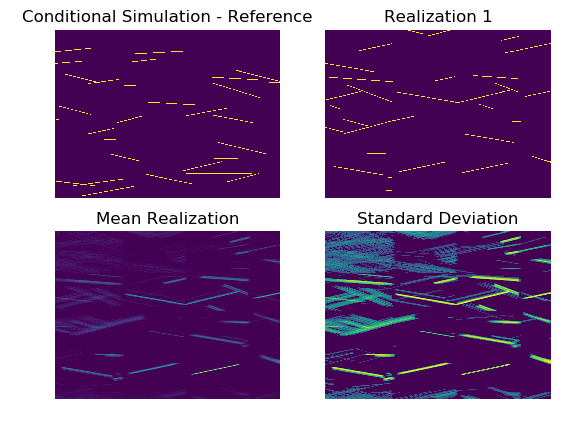


Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{A

In [31]:
#Summarize binary conditional simulation
subplot(2,2,1)
plotImage(R_prim)
axis("off")
title("Conditional Simulation - Reference")
subplot(2,2,2)
plotImage(binary_cond[1][:,:,1])
axis("off")
title("Realization 1")
subplot(2,2,3)
plotImage(binary_cond_mean)
axis("off")
title("Mean Realization")
subplot(2,2,4)
plotImage(binary_cond_stdev)
axis("off")
title("Standard Deviation")
;

In [32]:
#Save proximity conditional simulation
collectSimulation(
    prox_cond,
    TI_prox,
    t_prox_cond,
    sTI=TI_aux,
    truth=R_prox,
    soft=R_aux,
    saveSim=true,
    savename="Simulations/prox_cond_sim"
)

Dict{String,Any} with 6 entries:
  "Realizations"     => Array{Float64,3}[[0.966667 0.966667 … 0.0 0.0; 1.0 1.0 …
  "PrimaryTI"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.9 0.9 … 0.…
  "SecondaryTI"      => [0.125672 0.125672 … 0.128 0.128; 0.130771 0.130771 … 0…
  "Reference"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.…
  "TemplateSize"     => [160 160 1]
  "SoftConditioning" => [0.144202 0.144202 … 0.14937 0.14937; 0.151313 0.151313…

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

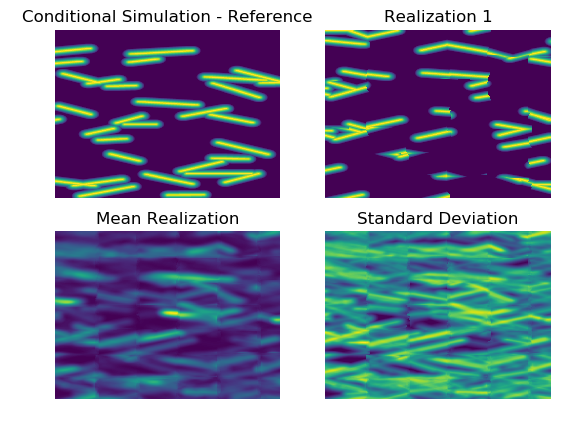

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

In [33]:
#Summarize proximity conditional simulation
subplot(2,2,1)
plotImage(R_prox)
axis("off")
title("Conditional Simulation - Reference")
subplot(2,2,2)
plotImage(prox_cond[1][:,:,1])
axis("off")
title("Realization 1")
subplot(2,2,3)
plotImage(prox_cond_mean)
axis("off")
title("Mean Realization")
subplot(2,2,4)
plotImage(prox_cond_stdev)
axis("off")
title("Standard Deviation")
;

We can also compare this to previous MPS simulation results using *wavesim*. These results are from a binary simulation on a resampled version of the binary TI above. The resampling was performed for a few reasons: (a) so the dimensions of the primary and secondary images matched and (2) to reduce computational time. The *wavesim* algorithm, written in Matlab, was very slow compared to this image quilting simulation and therefore reducing the size of the image was the only feasible way of performing a simulation. 

Below you can see the results of the simulation.

In [34]:
#Import wavesim results with custom function
cond_wavesim=load_wavesim_results(fracdata);

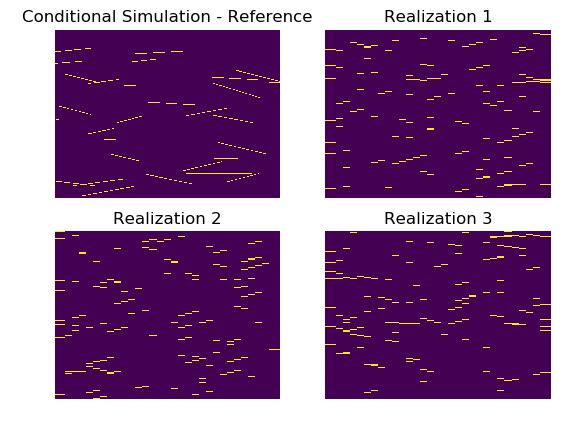

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

In [35]:
#Plot Wavesim realizations
subplot(2,2,1)
plotImage(R_prim)
axis("off")
title("Conditional Simulation - Reference")
for i=1:3
    subplot(2,2,i+1)
    plotImage(cond_wavesim[i][:,:,1])
    axis("off")
    title("Realization $(i)")
end
;

**Brief Discussion**

...

# 4. Assess Spatial Uncertainty

Now we introduce a methodology for quantifying the simulation results. The method is based on a Principal Coordinate Analysis, also known as MultiDimensional Scaling. 

First we compute a distance matrix for all the simulations using the custom function *distMat*. This function takes realizations, the training image, and the reference image and computes the Euclidean distance between all of them. We can use this distance matrix to perform MDS. For the binary images we apply a proximity transform before computing the distances. 

After this we compute the percent variance for the MDS coordinates and display the MDS results for the binary and proximity-transformed data.

In [36]:
#Same for binary simulations, but we apply prox transform to realizations first
input=vcat(realProxTrans(binary_uncond),realProxTrans(binary_cond),realProxTrans(cond_wavesim))
D_binary=distMat(input,TI_prox,R_prox)
mds_binary=classical_mds(D_binary,2);

#Compute distance matrix for proximity-transformed simulations and perform MDS
D_prox=distMat(vcat(prox_uncond,prox_cond),TI_prox,R_prox)
mds_prox=classical_mds(D_prox,2);

In [37]:
#This function computes the percent variance array
#Not sure why the built-in function doesn't do it
#but it's not too hard to do myself. 
function computePercentVariance(Dist)
    G=dmat2gram(Dist)
    va,ve=eig(G)
    pv=va./sum(va)
    return  pv[end:-1:1]
end
;

In [38]:
#Percent Variance
pv_binary=computePercentVariance(D_binary)
pv_prox=computePercentVariance(D_prox);

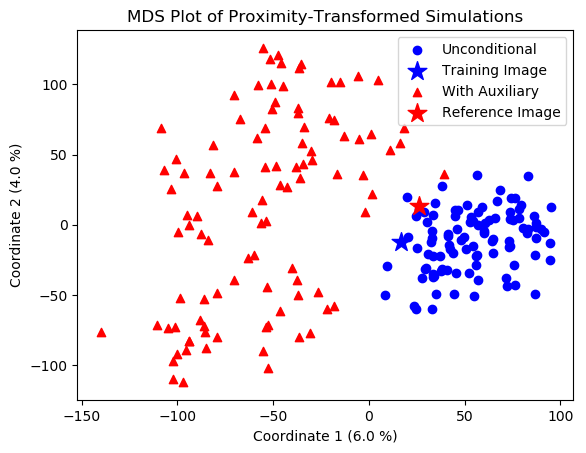

In [59]:
#Plot the results of the MDS for proximity-transformed simulations
s1=PyPlot.scatter(mds_prox[1,1:n],mds_prox[2,1:n],marker="o",c="b")
s2=PyPlot.scatter(mds_prox[1,n+1:n*2],mds_prox[2,n+1:n*2],marker="^",c="r")
s3=PyPlot.scatter(mds_prox[1,end-1],mds_prox[2,end-1],marker="*",s=200,c="b")
s4=PyPlot.scatter(mds_prox[1,end],mds_prox[2,end],marker="*",s=200,c="r")

legend((s1,s3,s2,s4),("Unconditional","Training Image","With Auxiliary","Reference Image"))
xlabel("Coordinate 1 ($(round(pv_prox[1]*100)) %)")
ylabel("Coordinate 2 ($(round(pv_prox[2]*100)) %)")
title("MDS Plot of Proximity-Transformed Simulations")
;

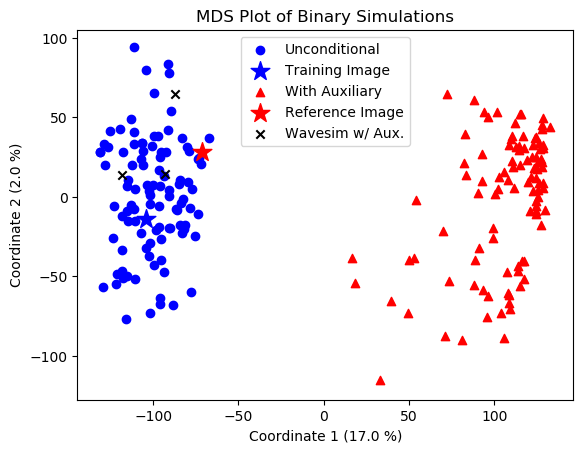

In [60]:
#Plot the results of the MDS for binary simulations
s1=PyPlot.scatter(mds_binary[1,1:n],mds_binary[2,1:n],marker="o",c="b")
s2=PyPlot.scatter(mds_binary[1,n+1:n*2],mds_binary[2,n+1:n*2],marker="^",c="r")
s3=PyPlot.scatter(mds_binary[1,end-1],mds_binary[2,end-1],marker="*",s=200,c="b")
s4=PyPlot.scatter(mds_binary[1,end],mds_binary[2,end],marker="*",s=200,c="r")
s5=PyPlot.scatter(mds_binary[1,n*2+1:n*2+3],mds_binary[2,n*2+1:n*2+3],marker="x",c="k")

legend((s1,s3,s2,s4,s5),("Unconditional","Training Image","With Auxiliary","Reference Image","Wavesim w/ Aux."))
xlabel("Coordinate 1 ($(round(pv_binary[1]*100)) %)")
ylabel("Coordinate 2 ($(round(pv_binary[2]*100)) %)")
title("MDS Plot of Binary Simulations")
;

**Brief Discussion**

These results do not seem to promising. The while we do observe some level of clustering of the conditional and unconditional realizations they do not cluster around their corresponding training images. They are, at least, better than the *wavesim* results. 

One problem is clearly the nonstationarity in the auxiliary data. The top of the auxiliary image has much larger values than the bottom due to scattering and attenuation of our GPR signal. Traditional processing techniques like gaining cannot amplify these lower reflectors without also amplifying the surrounding noise. Next, we will apply a different processing technique to try and amplify these reflectors while minimizing the noise amplification.

# 5. Using Uniform Score Transform

Now we will explore the effects of some additional post-processing of our geophysical data. Particularly, we will be using a procedure referred to as the Uniform Score Transform (UST). The uniform score transform takes the data of any distribution and converts it to a uniform distribution while preserving the order of the data. In simpler terms, we sort the data then replace each sample with its rank in the sorting. We can normalize by dividing by the number of samples in our data. This allows us to preserve the amplitude relationships such that the weak reflectors at the bottom of the auxiliary images are amplified. 

Below are plots of the data that will be used for the next round of conditional simulations. The auxiliary images used as conditioning data are now uniform-score transformed.

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

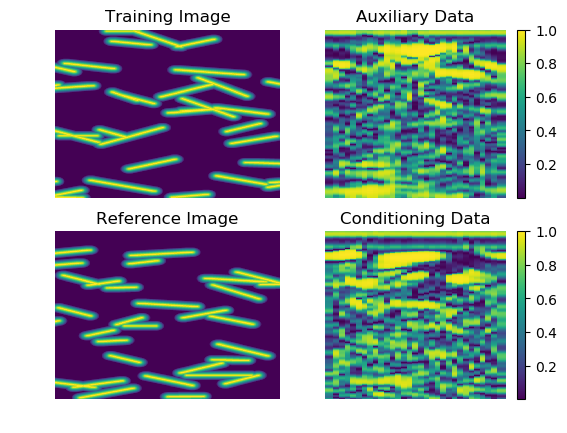

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

In [41]:
subplot(2,2,1)
plotImage(TI_prox[:,:,1])
axis("off")
title("Training Image")
subplot(2,2,2)
plotImage(ust(TI_aux))
axis("off")
title("Auxiliary Data")
colorbar()
subplot(2,2,3)
plotImage(R_prox[:,:,1])
axis("off")
title("Reference Image")
subplot(2,2,4)
plotImage(ust(R_aux))
axis("off")
title("Conditioning Data")
colorbar()
;

Now we can run our simulations and examine the results.

In [42]:
#Conditional image quilting simulation - no proximity transform
binary_cond_ust=iqsim(
    TI_prim,
    t_binary_cond...,
    size(TI_prim)..., 
    soft=[(ust(R_aux),ust(TI_aux))],
    nreal=n,
    overlapx=1/10,overlapy=1/10,
    gpu=true)

#Conditional image quilting simulation with proximity transform
prox_cond_ust=iqsim(
    TI_prox,
    t_prox_cond...,
    size(TI_prox)..., 
    soft=[(ust(R_aux),ust(TI_aux))],
    nreal=n,
    overlapx=1/10,overlapy=1/10,
    gpu=true)


#Compute mean & stdev of realizations
binary_cond_ust_mean, binary_cond_ust_stdev=realizationStats(binary_cond_ust)
prox_cond_ust_mean, prox_cond_ust_stdev=realizationStats(prox_cond_ust);

INFO: using GPU Turks
INFO: using GPU Turks


In [51]:
#Save UST conditional sims for binary
collectSimulation(
    binary_cond_ust,
    TI_prim,
    t_binary_cond,
    sTI=ust(TI_aux),
    truth=R_prim,
    soft=ust(R_aux),
    saveSim=true,
    savename="Simulations/binary_cond_ust_sim"
)

Dict{String,Any} with 6 entries:
  "Realizations"     => Array{Float64,3}[[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;…
  "PrimaryTI"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.…
  "SecondaryTI"      => [0.814794 0.814795 … 0.822961 0.822963; 0.833564 0.8335…
  "Reference"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.…
  "TemplateSize"     => [250 250 1]
  "SoftConditioning" => [0.810486 0.810487 … 0.826186 0.826187; 0.831213 0.8312…

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

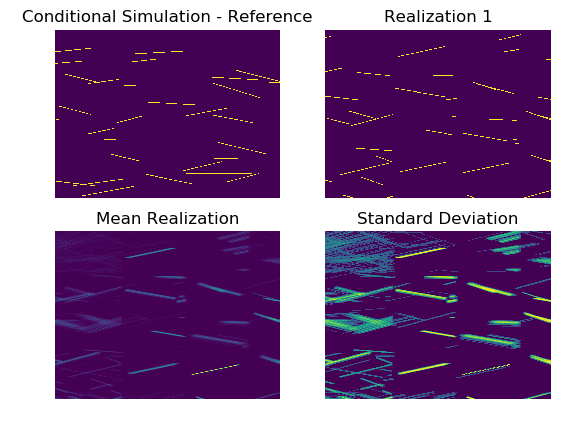

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

In [44]:
#Plot binary UST conditional sims
subplot(2,2,1)
plotImage(R_prim)
axis("off")
title("Conditional Simulation - Reference")
subplot(2,2,2)
plotImage(binary_cond_ust[1][:,:,1])
axis("off")
title("Realization 1")
subplot(2,2,3)
plotImage(binary_cond_ust_mean)
axis("off")
title("Mean Realization")
subplot(2,2,4)
plotImage(binary_cond_ust_stdev)
axis("off")
title("Standard Deviation")
;

In [52]:
#Save prox UST conditional sims
collectSimulation(
    prox_cond_ust,
    TI_prox,
    t_prox_cond,
    sTI=ust(TI_aux),
    truth=R_prox,
    soft=ust(R_aux),
    saveSim=true,
    savename="Simulations/prox_cond_ust_sim"
)

Dict{String,Any} with 6 entries:
  "Realizations"     => Array{Float64,3}[[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;…
  "PrimaryTI"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.9 0.9 … 0.…
  "SecondaryTI"      => [0.814794 0.814795 … 0.822961 0.822963; 0.833564 0.8335…
  "Reference"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.…
  "TemplateSize"     => [160 160 1]
  "SoftConditioning" => [0.810486 0.810487 … 0.826186 0.826187; 0.831213 0.8312…

Stacktrace:
 [1] partial_linear_indexing_warning_lookup(::Int64) at .\deprecated.jl:1074
 [2] checkbounds_linear_indices at .\abstractarray.jl:424 [inlined]
 [3] checkbounds_indices at .\abstractarray.jl:406 [inlined]
 [4] checkbounds_indices at .\abstractarray.jl:389 [inlined]
 [5] checkbounds at .\abstractarray.jl:342 [inlined]
 [6] checkbounds at .\abstractarray.jl:362 [inlined]
 [7] macro expansion at .\multidimensional.jl:494 [inlined]
 [8] _getindex at .\multidimensional.jl:491 [inlined]
 [9] getindex at .\abstractarray.jl:883 [inlined]
 [10] plotImage(::Array{Float64,3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Ar

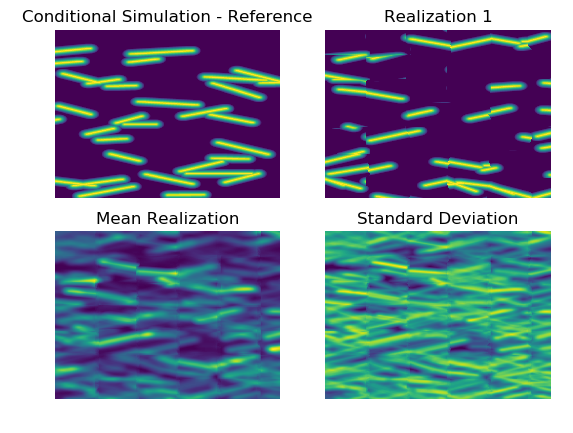

3}) at C:\Users\ammilten\Documents\Classes\GS240\Data Project\ImageQuiltingHelpers.jl\src\plotImage.jl:7
 [11] include_string(::String, ::String) at .\loading.jl:522
 [12] include_string(::Module, ::String, ::String) at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:71
 [13] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\ammilten\.julia\v0.6\IJulia\src\execute_request.jl:158
 [14] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\Users\ammilten\.julia\v0.6\Compat\src\Compat.jl:385
 [15] eventloop(::ZMQ.Socket) at C:\Users\ammilten\.julia\v0.6\IJulia\src\eventloop.jl:8
 [16] (::IJulia.##14#17)() at .\task.jl:335
while loading In[46], in expression starting on line 15


In [46]:
#Plot prox UST conditional sims
subplot(2,2,1)
plotImage(R_prox)
axis("off")
title("Conditional Simulation - Reference")
subplot(2,2,2)
plotImage(prox_cond_ust[1][:,:,1])
axis("off")
title("Realization 1")
subplot(2,2,3)
plotImage(prox_cond_ust_mean)
axis("off")
title("Mean Realization")
subplot(2,2,4)
plotImage(prox_cond_ust_stdev)
axis("off")
title("Standard Deviation")
;

In [47]:
#Compute distance matrix for proximity-transformed simulations and perform MDS
D_prox_ust=distMat(vcat(prox_uncond,prox_cond_ust),TI_prox,R_prox)
mds_prox_ust=classical_mds(D_prox_ust,2);

#Same for binary simulations, but we apply prox transform to realizations first
input=vcat(realProxTrans(binary_uncond),realProxTrans(binary_cond_ust),realProxTrans(cond_wavesim))
D_binary_ust=distMat(input,TI_prox,R_prox)
mds_binary_ust=classical_mds(D_binary_ust,2);


In [48]:
pv_prox_ust=computePercentVariance(D_prox_ust)
pv_binary_ust=computePercentVariance(D_binary_ust);

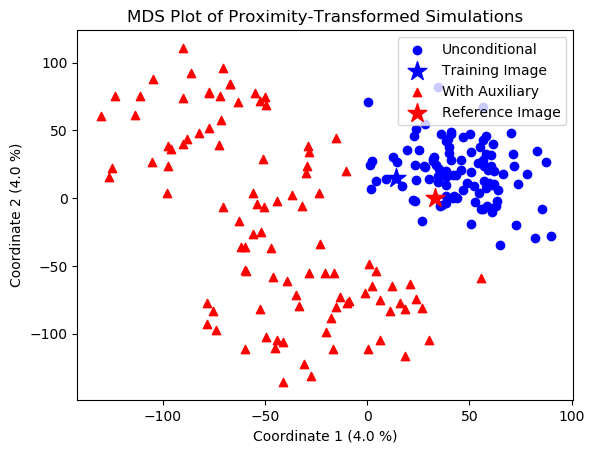

In [56]:
#Plot the results of the MDS for proximity-transformed simulations
s1=PyPlot.scatter(mds_prox_ust[1,1:n],mds_prox_ust[2,1:n],marker="o",c="b")
s2=PyPlot.scatter(mds_prox_ust[1,n+1:n*2],mds_prox_ust[2,n+1:n*2],marker="^",c="r")
s3=PyPlot.scatter(mds_prox_ust[1,end-1],mds_prox_ust[2,end-1],marker="*",s=200,c="b")
s4=PyPlot.scatter(mds_prox_ust[1,end],mds_prox_ust[2,end],marker="*",s=200,c="r")

legend((s1,s3,s2,s4),("Unconditional","Training Image","With Auxiliary","Reference Image"))
xlabel("Coordinate 1 ($(round(pv_prox_ust[1]*100)) %)")
ylabel("Coordinate 2 ($(round(pv_prox_ust[2]*100)) %)")
title("MDS Plot of Proximity-Transformed Simulations")
;


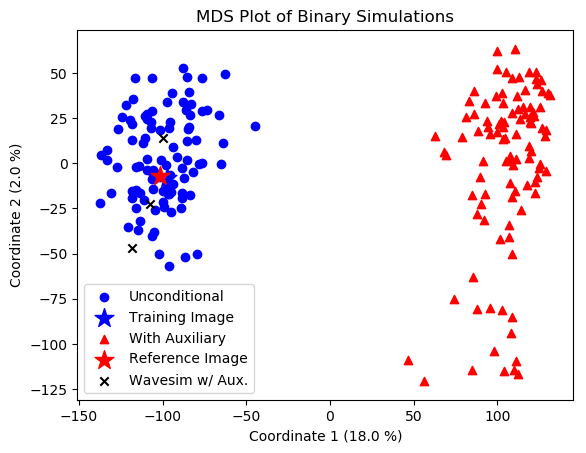

In [57]:
#Plot the results of the MDS for binary simulations
s1=PyPlot.scatter(mds_binary_ust[1,1:n],mds_binary_ust[2,1:n],marker="o",c="b")
s2=PyPlot.scatter(mds_binary_ust[1,n+1:n*2],mds_binary_ust[2,n+1:n*2],marker="^",c="r")
s3=PyPlot.scatter(mds_binary_ust[1,end-1],mds_binary_ust[2,end-1],marker="*",s=200,c="b")
s4=PyPlot.scatter(mds_binary_ust[1,end],mds_binary_ust[2,end],marker="*",s=200,c="r")
s5=PyPlot.scatter(mds_binary_ust[1,n*2+1:n*2+3],mds_binary_ust[2,n*2+1:n*2+3],marker="x",c="k")

legend((s1,s3,s2,s4,s5),("Unconditional","Training Image","With Auxiliary","Reference Image","Wavesim w/ Aux."))
xlabel("Coordinate 1 ($(round(pv_binary_ust[1]*100)) %)")
ylabel("Coordinate 2 ($(round(pv_binary_ust[2]*100)) %)")
title("MDS Plot of Binary Simulations")
;

**Brief Discussion**

...